![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

# Analysing Arctic Penguin Species

### About the Data

*This project is part of the Datacamp Portfolio Projects list.*

In this project, I'll be working with the arctict penguins data, collected by **Dr. Kristen Gorman, the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network**.

The data is in the csv format and contains 5 columns:
- Culmen* Length (mm)
- Culmen* Depth (mm)
- Flipper Length (mm)
- Body Mass (g)
- Sex

*Culmen: the upper ridge of a bird's bill (Oxford dictionary)*

The target of the analysis is to identify different species of penguins with the collected data.

The scientists are expecting at least 3 species native to the region:
- **Adelie**
- **Chinstrap**
- **Gentoo**

### Let's Get Started

In [2]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# pre-examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [3]:
# check for null values
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

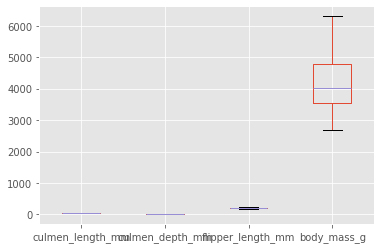

In [4]:
# check for outliers
plt.style.use('ggplot')
penguins_df.boxplot()  
plt.show()

In [5]:
# convert all columns into numeric values
# sex column will be devided into two columns with 1 and 0 for TRUE and FALSE
p_df = pd.get_dummies(penguins_df, dtype='int')
p_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [6]:
# convert the data to scaler form to use ın the unsupervısed learnıng algorithm
scaler = StandardScaler()
X = scaler.fit_transform(p_df)
p_scaled = pd.DataFrame(X, columns = p_df.columns)
p_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


### Perform PCA

[0.52034062 0.34463112 0.08585569 0.0322912  0.01688138 0.        ]


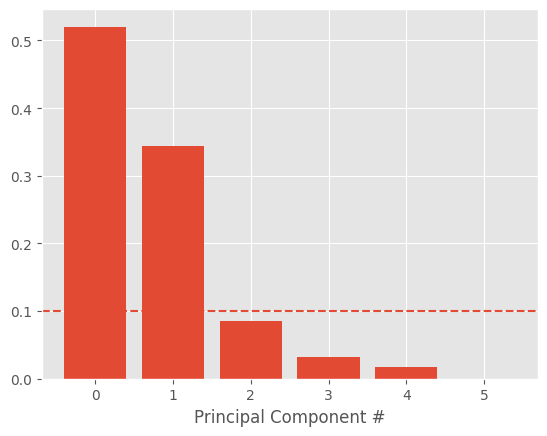

In [18]:
pca = PCA(n_components=None)
default_pca = pca.fit(p_scaled)
exp_variance = default_pca.explained_variance_ratio_
print(exp_variance)

fig,ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')
ax.axhline(y=0.1, linestyle='--')
plt.show()

In [19]:
n_components = sum(default_pca.explained_variance_ratio_ > 0.1)
print(f'Number of components: {n_components}')

pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(p_scaled)
penguins_PCA[0: 5]

Number of components: 2


array([[-0.71804612,  2.09712541],
       [-1.92706259, -0.40815983],
       [-1.95054409, -0.30487714],
       [-2.28314791,  0.16312656],
       [-0.60857189,  2.51282565]])

### K-Clustering

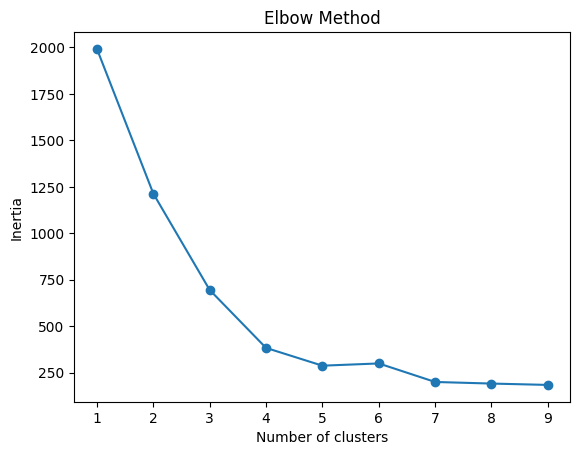

In [ ]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(p_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

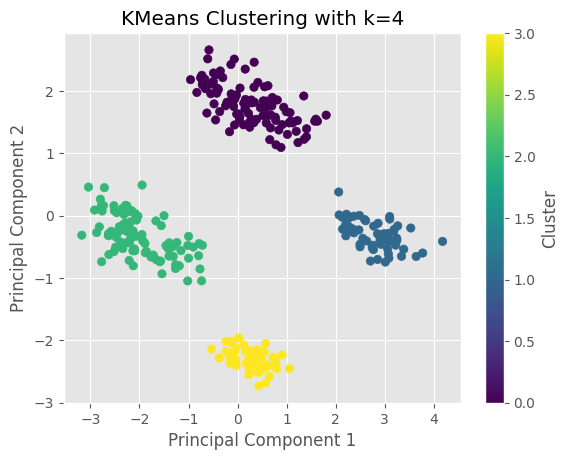

In [14]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'KMeans Clustering with k={n_clusters}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [20]:
penguins_df['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,label
label,,,,
0,43.878302,19.111321,194.764151,0.0
1,49.473770,15.718033,221.540984,1.0
2,40.217757,17.611215,189.046729,2.0
3,45.563793,14.237931,212.706897,3.0


### Conclusion

We can talk about the existence of 4 distinct groups in the data collected.